In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

In [2]:
import os

In [3]:
files = os.listdir(r'C:\Users\hp\DataAnalyst\Data_Analayst_Project\7_Project\Sales_Data')
files

['all_data.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
final = pd.DataFrame()

In [5]:
path = r"C:\Users\hp\DataAnalyst\Data_Analayst_Project\7_Project\Sales_Data"

In [6]:
for file in files:
    data = pd.read_csv(os.path.join(path, file), encoding='utf-8')
    final = pd.concat([data, final])

In [7]:
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
1307946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
1307947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
1307948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
final.shape

(1494800, 6)

In [9]:
#storing all the merge csv file data ina new csv file

In [10]:
final.to_csv(r"C:\Users\hp\DataAnalyst\Data_Analayst_Project\7_Project\Sales_Data\all_data.csv", index=False)


In [11]:
df = pd.read_csv(r"C:\Users\hp\DataAnalyst\Data_Analayst_Project\7_Project\Sales_Data\all_data.csv")

In [12]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
1494795,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
1494796,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
1494797,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
1494798,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [13]:
  final.isnull().sum()

Order ID            4360
Product             4360
Quantity Ordered    4360
Price Each          4360
Order Date          4360
Purchase Address    4360
dtype: int64

In [14]:
final =final.dropna(how = 'all')  # here we are saying that where there is null values, remove that entire entries

In [15]:
  final.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# P- What is the best month for sale

In [16]:
final['Order Date'].unique()

array(['09/17/19 14:44', '09/29/19 10:19', '09/16/19 17:48', ...,
       '04/15/19 16:02', '04/14/19 15:09', '04/18/19 11:08'], dtype=object)

# Convert using timestamp method

final['Order Date'] = pd.to_datetime(final['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')
invalid_mask = final['Order Date'].isna()
final_filtered = final[~invalid_mask]



final['MONTHS'] = final['Order Date'].dt.month

final

# Identify the expected format: Determine the expected format of the values in the column. For example, if you expect the 'Order Date' column to have values in the format "%m/%d/%y %H:%M", define that as the expected format.

Convert to datetime with errors='coerce': Use pd.to_datetime() with the errors='coerce' parameter to convert the column to datetime, allowing any invalid or unparseable values to be converted to NaT (Not a Time). This will ensure that the majority of valid values are converted correctly, while any unexpected values are replaced with NaT.
    
    
    Filter out invalid values: Create a boolean mask to identify rows where the 'Order Date' column contains NaT values, indicating invalid or unexpected values.
        
    invalid_mask = final['Order Date'].isna()

    
    


In [17]:
# Extract month by suing split functions

In [18]:
# let take one date

In [19]:
"09/17/19 14:44".split("/")

['09', '17', '19 14:44']

In [20]:
"09/17/19 14:44".split("/")[0]

'09'

In [21]:
# so we can make a function  that can take out month by this way of spliting

def month(x):
    return x.split("/")[0]

In [22]:
final['Month'] = final['Order Date'].apply(month)

C:\Users\hp\AppData\Local\Temp\ipykernel_3852\2061450754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Month'] = final['Order Date'].apply(month)


In [23]:
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09
...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
1307946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
1307947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
1307948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [24]:
final['Month'].unique()

array(['09', '10', 'Order Date', '11', '12', '05', '06', '03', '04', '07',
       '08', '01', '02'], dtype=object)

In [25]:
#now here we can see that month has some unique valuee which cannot be formated to timestamp

In [26]:
filter = final['Month'] == 'Order Date'

In [27]:
final = final[~filter]

#the code removes the rows from the DataFrame final where the value in the 'Month' column is equal to 'Order Date'.

#The ~ operator is generally used for negation or inverting boolean conditions. It can be used in combination with other logical operators such as & (and), | (or), and parentheses for more complex conditions. It's handy when you want to negate a boolean condition before using it for filtering, masking, or other operations.

In [28]:
final.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [29]:
final['Month'] = final['Month'].astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_3852\3167526038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Month'] = final['Month'].astype(int)


# now to find the sales we have to multiply Quantity order and price each column

In [30]:
final['Sales'] = final['Quantity Ordered'] * final['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [31]:
# so we have to convert columns into int

In [32]:
    final['Quantity Ordered'] = final['Quantity Ordered'].astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_3852\1075518054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Quantity Ordered'] = final['Quantity Ordered'].astype(int)


In [33]:
  final['Price Each'] = final['Price Each'].astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_3852\2787180164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Price Each'] = final['Price Each'].astype(float)


In [34]:
final['Sales'] = final['Quantity Ordered']*final['Price Each']

C:\Users\hp\AppData\Local\Temp\ipykernel_3852\168881840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Sales'] = final['Quantity Ordered']*final['Price Each']


In [35]:
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95
...,...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
1307946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
1307947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
1307948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [36]:
max_sale = final.groupby('Month')['Sales'].sum().sort_values(ascending=False)

In [37]:
max_sale

Month
12    36907546.72
10    29893815.04
4     27125361.92
11    25596825.60
5     25220854.00
3     22456803.04
7     21182206.08
6     20622418.08
8     17955743.04
2     17616179.36
9     16780481.04
1     14578053.84
Name: Sales, dtype: float64

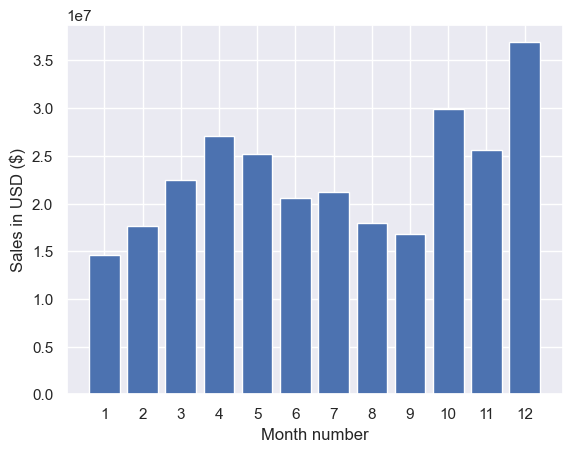

In [38]:
months=range(1,13)
plt.bar(months,final.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



In [39]:
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95
...,...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
1307946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
1307947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
1307948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


# Which city has max order

In [40]:
"380 North St, Los Angeles, CA 90001".split(",")

['380 North St', ' Los Angeles', ' CA 90001']

In [41]:
"380 North St, Los Angeles, CA 90001".split(",")[-2]

' Los Angeles'

In [42]:
def city(s):
    return s.split(",")[-2]

In [43]:
final['City'] = final['Purchase Address'].apply(city)

C:\Users\hp\AppData\Local\Temp\ipykernel_3852\2676793674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['City'] = final['Purchase Address'].apply(city)


In [44]:
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
1307946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
1307947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
1307948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [45]:
final['City'].unique()

array([' Los Angeles', ' Austin', ' Seattle', ' Atlanta', ' Portland',
       ' New York City', ' San Francisco', ' Boston', ' Dallas'],
      dtype=object)

In [46]:
order = final.groupby('City')['City'].count()

In [47]:
order

City
 Atlanta          119048
 Austin            79240
 Boston           159472
 Dallas           118560
 Los Angeles      236840
 New York City    199008
 Portland          99720
 San Francisco    357856
 Seattle          117856
Name: City, dtype: int64

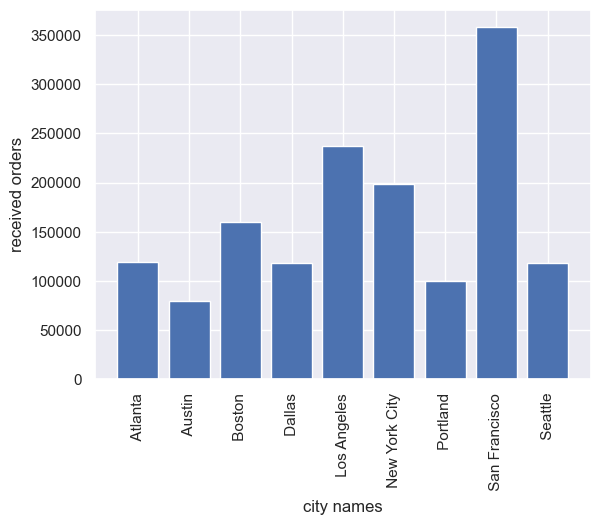

In [48]:
plt.bar(final.groupby('City')['City'].count().index,final.groupby('City')['City'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

In this code, groupby('City') groups the DataFrame final by the 'City' column, creating groups based on the unique city names. Then, ['City'] selects the 'City' column from the grouped data. Finally, .count() counts the number of occurrences of each city in the grouped data, resulting in a Series with the city names as the index and the count of orders for each city as the values.

By using this code, you can determine which city has the maximum number of orders by finding the city with the highest count in the resulting Series. Here's an example of how you can find the city with the maximum order count:

# at what times sales of PRoduct purchase is max

In [49]:
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
1307946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
1307947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
1307948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [50]:
final['Order Date'].dtype

dtype('O')

In [51]:
# as datatype is string so we convert it to datetimestamp

In [52]:
final['Order Date'] = pd.to_datetime(final['Order Date'], format='%m/%d/%y %H:%M')

C:\Users\hp\AppData\Local\Temp\ipykernel_3852\4142852706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Order Date'] = pd.to_datetime(final['Order Date'], format='%m/%d/%y %H:%M')


In [53]:
final['Hour'] = final['Order Date'].dt.hour

C:\Users\hp\AppData\Local\Temp\ipykernel_3852\3023193621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Hour'] = final['Order Date'].dt.hour


In [54]:
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19
...,...,...,...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
1307946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
1307947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
1307948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


# ANother way to extract hour using split function

In [55]:
order_date_time = "09/17/19 14:44"

In [56]:
split_values = order_date_time.split(" ")

In [57]:
split_values

['09/17/19', '14:44']

In [58]:
date = split_values[0]
time = split_values[1]

In [59]:
date

'09/17/19'

In [60]:
time

'14:44'

In [61]:
hoursss = time.split(":")[0]

In [62]:
hoursss

'14'

In [63]:
keys=[]
hour=[]
for key,hour_df in final.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

In [64]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [65]:
hour

[31280,
 18800,
 9944,
 6648,
 6832,
 10568,
 19856,
 32088,
 50048,
 69984,
 87552,
 99288,
 100696,
 97032,
 87872,
 81400,
 83072,
 87192,
 98240,
 103240,
 97824,
 87368,
 70576,
 50200]

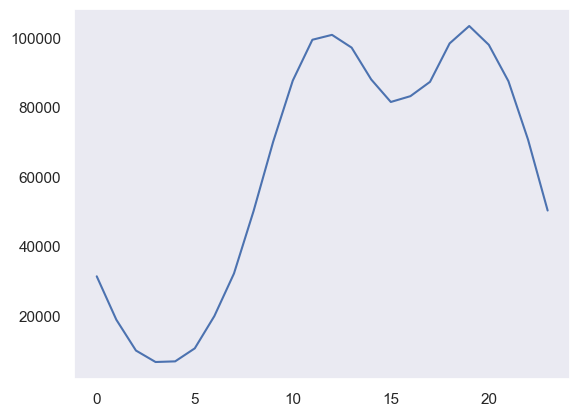

In [66]:
plt.grid()
plt.plot(keys,hour)

In [67]:
Product_purchase = final.groupby('Hour')['Sales'].sum()

In [68]:
Product_purchase

Hour
0      5709770.16
1      3686935.04
2      1878811.52
3      1166063.12
4      1301288.08
5      1845438.56
6      3584904.00
7      5958832.96
8      9538791.76
9     13112244.64
10    15554294.16
11    18404881.92
12    18534570.72
13    17243118.40
14    16669381.84
15    15532396.80
16    15236810.48
17    17034892.88
18    17754786.40
19    19303508.32
20    18253729.92
21    16336006.88
22    12860393.68
23     9434435.52
Name: Sales, dtype: float64

In [69]:
max_purchase = Product_purchase.idxmax()

In [70]:
max_purchase

19

In [71]:
Product_purchase = final.groupby('Hour')['Sales'].size()
Product_purchase

Hour
0      31280
1      18800
2       9944
3       6648
4       6832
5      10568
6      19856
7      32088
8      50048
9      69984
10     87552
11     99288
12    100696
13     97032
14     87872
15     81400
16     83072
17     87192
18     98240
19    103240
20     97824
21     87368
22     70576
23     50200
Name: Sales, dtype: int64

In [72]:
max_purchase = Product_purchase.idxmax()
max_purchase

19

The difference between using size() and sum() in the context of grouping by hour and analyzing sales data is as follows:

size(): When you use size() in the context of final.groupby('Hour')['Sales'].size(), it counts the number of occurrences (or rows) for each hour. This means that it gives you the count of sales transactions or purchases that occurred within each hour. The result will be a Series that shows the count of sales for each hour.

sum(): On the other hand, when you use sum() in the context of final.groupby('Hour')['Sales'].sum(), it calculates the sum of the 'Sales' values for each hour. This means that it gives you the total sales amount for each hour, considering the 'Sales' values in each transaction. The result will be a Series that shows the total sales amount for each hour.

So, the main difference is in the nature of the aggregation:

size() gives you the count of occurrences or transactions.
sum() gives you the sum or total value of a specific column (in this case, 'Sales').
The choice between size() and sum() depends on the type of analysis you want to perform. If you want to know the number of transactions or purchases made within each hour, you would use size(). If you want to know the total sales amount for each hour, you would use sum().

In summary, size() is used to count occurrences or transactions, while sum() is used to calculate the sum or total value of a specific column. The two methods provide different insights into the data and are used based on the specific analysis requirements.

size() says ki 1 hours mei 50 baar sales hui and
sum() says ki 1 hours mei 1000rs ki sales hui

The choice between these methods depends on your specific analysis needs. If you want to count all occurrences, including null values, use size(). If you want to count only non-null values or valid sales transactions, use count(). If you want to calculate the total sales amount, use sum()

# What product sold the most? & Why?

In [73]:
final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19
...,...,...,...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
1307946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
1307947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
1307948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [74]:
prduct_sold_most = final.groupby('Product')['Quantity Ordered'].sum()

In [75]:
prduct_sold_most

Product
20in Monitor                   33032
27in 4K Gaming Monitor         49952
27in FHD Monitor               60400
34in Ultrawide Monitor         49592
AA Batteries (4-pack)         221080
AAA Batteries (4-pack)        248136
Apple Airpods Headphones      125288
Bose SoundSport Headphones    107656
Flatscreen TV                  38552
Google Phone                   44256
LG Dryer                        5168
LG Washing Machine              5328
Lightning Charging Cable      185736
Macbook Pro Laptop             37824
ThinkPad Laptop                33040
USB-C Charging Cable          191800
Vareebadd Phone                16544
Wired Headphones              164456
iPhone                         54792
Name: Quantity Ordered, dtype: int32

# Which are the products that are sold in a group

In [79]:
df = final['Order ID'].duplicated(keep = False)
df2 = final[df]

In [82]:
df2
#df2 represents a new DataFrame that contains only the rows from final where the 'Order ID' is duplicated. 
#It includes all occurrences of the duplicated 'Order ID' values, allowing you to further analyze or process 
#those specific rows separately.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19
...,...,...,...,...,...,...,...,...,...,...
1307945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
1307946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
1307947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
1307948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [83]:
df2['Gouped'] = df2.groupby('Order ID')['Product'].transform(lambda x :','.join(x))

df2['Gouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)): This line creates a new column called 'Grouped' in the DataFrame df2. It groups the rows by 'Order ID' and applies the ','.join(x) function to concatenate the values in the 'Product' column for each group, separated by commas. The transform() function ensures that the concatenated values are aligned with the original rows.

In [84]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Gouped
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [85]:
df2 = df2.drop_duplicates(subset = ['Order ID'])

In [86]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Gouped
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
...,...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,600.00,Los Angeles,17,"Google Phone,Google Phone,Google Phone,Google ..."
18379,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,3.84,Austin,16,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
18380,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,5.98,San Francisco,14,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
18381,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,3.84,Portland,15,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."


In [90]:
df2['Gouped'].value_counts()

Gouped
Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable                                                                                                                                                                                                                            19831
AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)                                                                                                                                                                                                                                            19826
AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack),AA Batterie